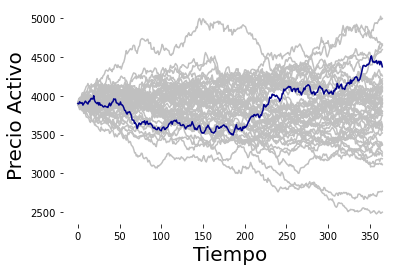

In [4]:
from numpy import *
from pylab import *
from numpy.random import rand
import scipy.stats
import matplotlib.pyplot as plt

#Simulacion de un MBG

norminv = scipy.stats.distributions.norm.ppf         
norm = scipy.stats.distributions.norm.cdf

M = 100               #Numero de caminos
d = 365                #Numero de pasos - En este caso se simulan diariamente
spot = 3900

T=1                    #Tiempo al vencimiento
delta_t = T/d


y1 = rand(M,d)
z1 = norminv(y1)

initial_spot_asset1=spot*ones((M,1))

ASSET1 = zeros((M,d))
ASSET1 = append(initial_spot_asset1,ASSET1,axis=1) 


r = -0.0175           #Tasa de interes
sigma = 0.12      #Volatilidad

for i in range(0,M):
    for j in range(0,d):
        ASSET1[i,j+1] = ASSET1[i,j]*exp((r-0.5*sigma**2)*delta_t+sigma*sqrt(delta_t)*z1[i,j])


plt.plot(ASSET1[0:50,:].transpose(),c='silver')
plt.plot(ASSET1[0:1,:].transpose(),c='darkblue')
ylabel('Precio Activo',fontsize=20)
xlabel( 'Tiempo',fontsize=20)
box(on=None)

show()